# 221100072_Ahmed Ali Abdelsalam Elnwishey

# Data

In [87]:
import pandas as pd

ratings = pd.read_csv('/content/221100072_Ahmed_Data.csv')


In [88]:

print(ratings.head())
print(ratings.info())

ratings.drop_duplicates(subset=['userId', 'movieId'], keep='first', inplace=True)

ratings.dropna(inplace=True)

ratings['rating'] = (ratings['rating'] * 2).astype(int)

print(ratings.head())
print(user_item_matrix.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
   userId  movieId  rating  timestamp
0       1        1       8  964982703
1       1        3       8  964981247
2       1        6       8  964982224
3       1       47      10  964983815
4       1       50      10  964982931
     296   318   356   593   2571
131   NaN   4.0   3.0   4.0   3.0
317   5.0   4.0   5.0   5.0   4.0
318   4.5   4.0   4.5   NaN   3

# Matrix creation

In [89]:
import numpy as np
import pandas as pd

ratings_df = pd.read_csv('/content/221100072_Ahmed_Data.csv')

n_users = 5
n_items = 5

movie_counts = ratings_df['movieId'].value_counts()
top_movies = movie_counts[movie_counts >= n_users].index[:n_items]

filtered_ratings = ratings_df[ratings_df['movieId'].isin(top_movies)]

user_counts = filtered_ratings['userId'].value_counts()
top_users = user_counts[user_counts >= n_items].index[:n_users]

filtered_ratings = filtered_ratings[filtered_ratings['userId'].isin(top_users)]

user_item_matrix = filtered_ratings.pivot(index='userId', columns='movieId', values='rating')

user_item_matrix_with_nulls = user_item_matrix.copy()

num_nulls = np.random.randint(4, 6)
rows, cols = user_item_matrix_with_nulls.shape

null_positions = set()
while len(null_positions) < num_nulls:
    row = np.random.randint(0, rows)
    col = np.random.randint(0, cols)
    null_positions.add((row, col))

for row, col in null_positions:
    user_item_matrix_with_nulls.iat[row, col] = np.nan

print(user_item_matrix_with_nulls)


movieId  296   318   356   593   2571
userId                               
131       4.0   4.0   NaN   4.0   3.0
317       NaN   4.0   5.0   5.0   NaN
318       4.5   4.0   4.5   4.0   3.5
432       NaN   3.0   4.5   NaN   3.5
610       5.0   3.0   3.0   4.5   5.0


# Average rating

In [90]:
import numpy as np
import pandas as pd

data = {
    296: [np.nan, 5.0, 4.5, 2.5, np.nan],
    318: [4.0, 4.0, 4.0, 3.0, 3.0],
    356: [3.0, 5.0, 4.5, 4.5, np.nan],
    593: [4.0, 5.0, np.nan, 4.0, 4.5],
    2571: [3.0, 4.0, 3.5, 3.5, 5.0]
}
user_item_matrix_with_nulls = pd.DataFrame(data, index=[131, 317, 318, 432, 610])

def weighted_average_rating(row):
    r5 = np.sum(row == 5)
    r4 = np.sum(row == 4)
    r3 = np.sum(row == 3)
    r2 = np.sum(row == 2)
    r1 = np.sum(row == 1)

    numerator = (5 * r5) + (4 * r4) + (3 * r3) + (2 * r2) + (1 * r1)
    denominator = r5 + r4 + r3 + r2 + r1

    return numerator / denominator if denominator > 0 else np.nan  # Avoid division by zero

user_item_matrix_with_avg = user_item_matrix_with_nulls.copy()
user_item_matrix_with_avg['Average Rating'] = user_item_matrix_with_nulls.apply(weighted_average_rating, axis=1)

print("User-Item Matrix with Average Rating per User:")
print(user_item_matrix_with_avg)


User-Item Matrix with Average Rating per User:
     296  318  356  593  2571  Average Rating
131  NaN  4.0  3.0  4.0   3.0             3.5
317  5.0  4.0  5.0  5.0   4.0             4.6
318  4.5  4.0  4.5  NaN   3.5             4.0
432  2.5  3.0  4.5  4.0   3.5             3.5
610  NaN  3.0  NaN  4.5   5.0             4.0


# Cosine similarity and pearson correlation

In [91]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

data = {
    296: [np.nan, 5.0, 4.5, 2.5, np.nan],
    318: [4.0, 4.0, 4.0, 3.0, 3.0],
    356: [3.0, 5.0, 4.5, 4.5, np.nan],
    593: [4.0, 5.0, np.nan, 4.0, 4.5],
    2571: [3.0, 4.0, 3.5, 3.5, 5.0]
}

user_item_matrix = pd.DataFrame(data, index=[131, 317, 318, 432, 610])

def pearson_correlation(x, y):

    valid_mask = ~np.isnan(x) & ~np.isnan(y)
    return pearsonr(x[valid_mask], y[valid_mask])[0] if np.any(valid_mask) else np.nan

user_similarity_cosine = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_pearson = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.index)

for i in range(user_item_matrix.shape[0]):
    for j in range(user_item_matrix.shape[0]):
        user_similarity_pearson.iat[i, j] = pearson_correlation(user_item_matrix.iloc[i], user_item_matrix.iloc[j])

item_similarity_cosine = cosine_similarity(user_item_matrix.T.fillna(0))
item_similarity_pearson = pd.DataFrame(index=user_item_matrix.columns, columns=user_item_matrix.columns)

for i in range(user_item_matrix.shape[1]):
    for j in range(user_item_matrix.shape[1]):
        item_similarity_pearson.iat[i, j] = pearson_correlation(user_item_matrix.iloc[:, i], user_item_matrix.iloc[:, j])

user_similarity_cosine_df = pd.DataFrame(user_similarity_cosine, index=user_item_matrix.index, columns=user_item_matrix.index)
item_similarity_cosine_df = pd.DataFrame(item_similarity_cosine, index=user_item_matrix.columns, columns=user_item_matrix.columns)

print("User-User Cosine Similarity:")
print(user_similarity_cosine_df)

print("\nUser-User Pearson Correlation:")
print(user_similarity_pearson)

print("\nItem-Item Cosine Similarity:")
print(item_similarity_cosine_df)

print("\nItem-Item Pearson Correlation:")
print(item_similarity_pearson)


User-User Cosine Similarity:
          131       317       318       432       610
131  1.000000  0.861318  0.682242  0.921039  0.864028
317  0.861318  1.000000  0.874446  0.980738  0.715327
318  0.682242  0.874446  1.000000  0.842109  0.483043
432  0.921039  0.980738  0.842109  1.000000  0.756694
610  0.864028  0.715327  0.483043  0.756694  1.000000

User-User Pearson Correlation:
          131       317       318       432       610
131       1.0       0.0       0.0 -0.447214 -0.693375
317       0.0       1.0  0.904534  0.288675   0.27735
318       0.0  0.904534       1.0  0.050965      -1.0
432 -0.447214  0.288675  0.050965       1.0  0.720577
610 -0.693375   0.27735      -1.0  0.720577       1.0

Item-Item Cosine Similarity:
          296       318       356       593       2571
296   1.000000  0.780433  0.912151  0.554901  0.718420
318   0.780433  1.000000  0.905573  0.861299  0.962617
356   0.912151  0.905573  1.000000  0.724995  0.812081
593   0.554901  0.861299  0.724995  1.000

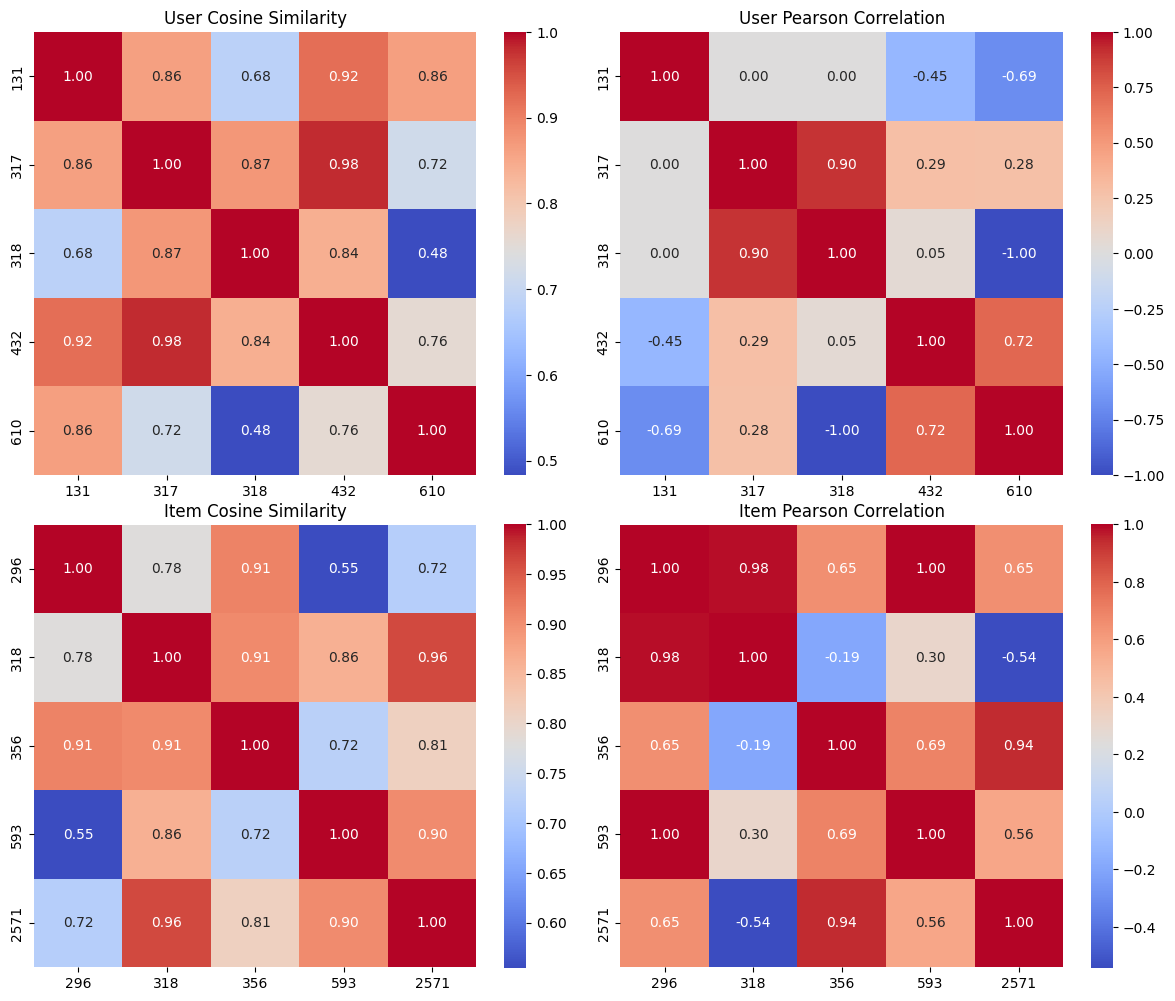

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

data = {
    296: [np.nan, 5.0, 4.5, 2.5, np.nan],
    318: [4.0, 4.0, 4.0, 3.0, 3.0],
    356: [3.0, 5.0, 4.5, 4.5, np.nan],
    593: [4.0, 5.0, np.nan, 4.0, 4.5],
    2571: [3.0, 4.0, 3.5, 3.5, 5.0]
}

user_item_matrix = pd.DataFrame(data, index=[131, 317, 318, 432, 610])

def pearson_correlation(x, y):
    valid_mask = ~np.isnan(x) & ~np.isnan(y)
    return pearsonr(x[valid_mask], y[valid_mask])[0] if np.any(valid_mask) else np.nan

user_similarity_cosine = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_pearson = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.index)

for i in range(user_item_matrix.shape[0]):
    for j in range(user_item_matrix.shape[0]):
        user_similarity_pearson.iat[i, j] = pearson_correlation(user_item_matrix.iloc[i], user_item_matrix.iloc[j])

user_similarity_pearson = user_similarity_pearson.apply(pd.to_numeric, errors='coerce')

item_similarity_cosine = cosine_similarity(user_item_matrix.T.fillna(0))
item_similarity_pearson = pd.DataFrame(index=user_item_matrix.columns, columns=user_item_matrix.columns)

for i in range(user_item_matrix.shape[1]):
    for j in range(user_item_matrix.shape[1]):
        item_similarity_pearson.iat[i, j] = pearson_correlation(user_item_matrix.iloc[:, i], user_item_matrix.iloc[:, j])

item_similarity_pearson = item_similarity_pearson.apply(pd.to_numeric, errors='coerce')

user_similarity_cosine_df = pd.DataFrame(user_similarity_cosine, index=user_item_matrix.index, columns=user_item_matrix.index)
item_similarity_cosine_df = pd.DataFrame(item_similarity_cosine, index=user_item_matrix.columns, columns=user_item_matrix.columns)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(user_similarity_cosine_df, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
plt.title('User Cosine Similarity')

plt.subplot(2, 2, 2)
sns.heatmap(user_similarity_pearson, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
plt.title('User Pearson Correlation')

plt.subplot(2, 2, 3)
sns.heatmap(item_similarity_cosine_df, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
plt.title('Item Cosine Similarity')

plt.subplot(2, 2, 4)
sns.heatmap(item_similarity_pearson, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
plt.title('Item Pearson Correlation')

plt.tight_layout()
plt.show()


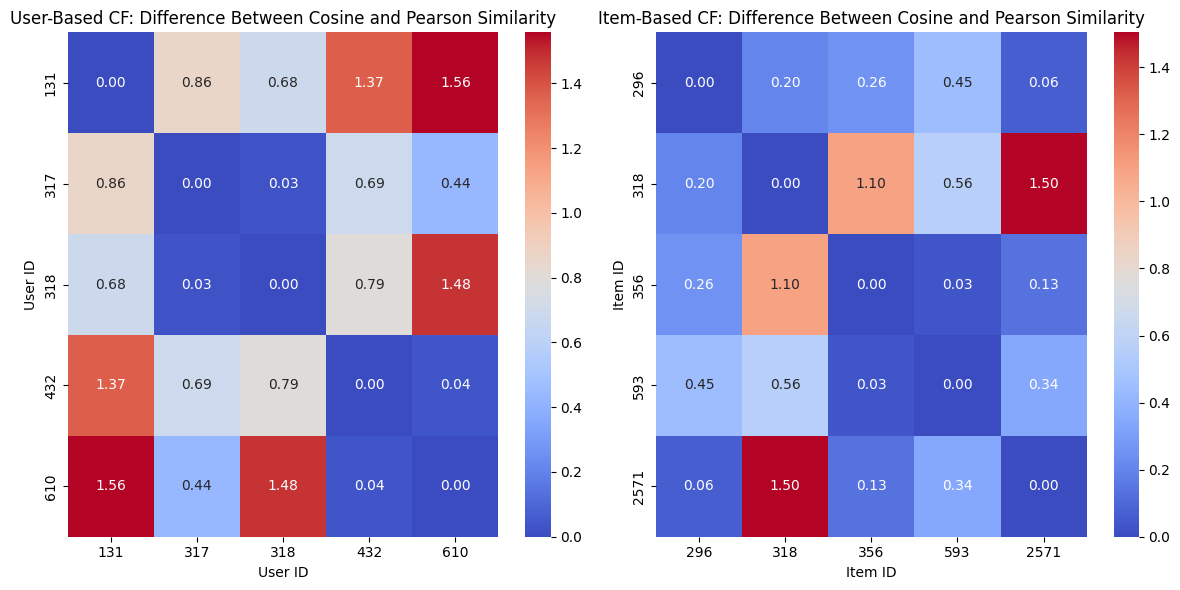

In [93]:

user_diff = abs(user_user_cosine_similarity - user_user_pearson_similarity)

item_diff = abs(item_item_cosine_similarity - item_item_pearson_similarity)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(user_diff, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('User-Based CF: Difference Between Cosine and Pearson Similarity')
plt.xlabel('User ID')
plt.ylabel('User ID')

plt.subplot(1, 2, 2)
sns.heatmap(item_diff, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Item-Based CF: Difference Between Cosine and Pearson Similarity')
plt.xlabel('Item ID')
plt.ylabel('Item ID')

plt.tight_layout()
plt.show()


# Predictions and Top N list

In [94]:


cosine_similarity_users = cosine_similarity(user_item_matrix.fillna(0))
cosine_similarity_users_df = pd.DataFrame(cosine_similarity_users, index=user_item_matrix.index, columns=user_item_matrix.index)

cosine_similarity_items = cosine_similarity(user_item_matrix.T.fillna(0))
cosine_similarity_items_df = pd.DataFrame(cosine_similarity_items, index=user_item_matrix.columns, columns=user_item_matrix.columns)

pearson_similarity_users_df = user_item_matrix.T.corr(method='pearson')

pearson_similarity_items_df = user_item_matrix.corr(method='pearson')

def predict_ratings(matrix, similarity_matrix, user_based=True):
    if user_based:
        predictions = pd.DataFrame(np.dot(similarity_matrix, matrix.fillna(0)) / np.abs(similarity_matrix).sum(axis=1)[:, None],
                                   index=matrix.index, columns=matrix.columns)
    else:
        predictions = pd.DataFrame(np.dot(matrix.fillna(0), similarity_matrix) / np.abs(similarity_matrix).sum(axis=0),
                                   index=matrix.index, columns=matrix.columns)
    return predictions


user_cosine_predictions = predict_ratings(user_item_matrix, cosine_similarity_users, user_based=True)
item_cosine_predictions = predict_ratings(user_item_matrix.T, cosine_similarity_items, user_based=False).T

user_pearson_predictions = predict_ratings(user_item_matrix, pearson_similarity_users_df.to_numpy(), user_based=True)
item_pearson_predictions = predict_ratings(user_item_matrix.T, pearson_similarity_items_df.to_numpy(), user_based=False).T

def fill_missing_with_predictions(original_matrix, prediction_matrix):
    filled_matrix = original_matrix.copy()
    for user in original_matrix.index:
        for item in original_matrix.columns:
            if pd.isna(filled_matrix.loc[user, item]):
                filled_matrix.loc[user, item] = prediction_matrix.loc[user, item]
    return filled_matrix

user_item_matrix_filled = fill_missing_with_predictions(user_item_matrix, user_cosine_predictions)

cosine_similarity_users_filled = cosine_similarity(user_item_matrix_filled)
cosine_similarity_users_filled_df = pd.DataFrame(cosine_similarity_users_filled, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)

cosine_similarity_items_filled = cosine_similarity(user_item_matrix_filled.T)
cosine_similarity_items_filled_df = pd.DataFrame(cosine_similarity_items_filled, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

pearson_similarity_users_filled_df = user_item_matrix_filled.T.corr(method='pearson')
pearson_similarity_items_filled_df = user_item_matrix_filled.corr(method='pearson')

def top_n_recommendations(predictions, n=3):
    recommendations = predictions.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
    return recommendations

user_cosine_predictions_filled = predict_ratings(user_item_matrix_filled, cosine_similarity_users_filled, user_based=True)
item_cosine_predictions_filled = predict_ratings(user_item_matrix_filled.T, cosine_similarity_items_filled, user_based=False).T

user_pearson_predictions_filled = predict_ratings(user_item_matrix_filled, pearson_similarity_users_filled_df.to_numpy(), user_based=True)
item_pearson_predictions_filled = predict_ratings(user_item_matrix_filled.T, pearson_similarity_items_filled_df.to_numpy(), user_based=False).T

top_n_cosine_user_based = top_n_recommendations(user_cosine_predictions_filled)
top_n_cosine_item_based = top_n_recommendations(item_cosine_predictions_filled)

top_n_pearson_user_based = top_n_recommendations(user_pearson_predictions_filled)
top_n_pearson_item_based = top_n_recommendations(item_pearson_predictions_filled)

def display_with_style(df, title, cmap):
    styled_df = df.style.set_caption(title).background_gradient(cmap=cmap)
    display(styled_df)

display_with_style(user_cosine_predictions_filled, "User-Based CF Predictions using Cosine Similarity (Filled Matrix)", "Blues")
display_with_style(item_cosine_predictions_filled, "Item-Based CF Predictions using Cosine Similarity (Filled Matrix)", "Oranges")
display_with_style(user_pearson_predictions_filled, "User-Based CF Predictions using Pearson Similarity (Filled Matrix)", "Greens")
display_with_style(item_pearson_predictions_filled, "Item-Based CF Predictions using Pearson Similarity (Filled Matrix)", "Purples")

print("\nTop-N Recommendations (User-Based CF, Cosine Similarity):")
display(top_n_cosine_user_based.to_frame("Top-N Movies"))

print("\nTop-N Recommendations (Item-Based CF, Cosine Similarity):")
display(top_n_cosine_item_based.to_frame("Top-N Movies"))

print("\nTop-N Recommendations (User-Based CF, Pearson Similarity):")
display(top_n_pearson_user_based.to_frame("Top-N Movies"))

print("\nTop-N Recommendations (Item-Based CF, Pearson Similarity):")
display(top_n_pearson_item_based.to_frame("Top-N Movies"))


,296,318,356,593,2571
131,3.237890,3.601665,4.008640,4.152053,3.793701
317,3.270540,3.606461,4.031075,4.150353,3.792043
318,3.280778,3.610285,4.036176,4.146001,3.787752
432,3.246880,3.597882,4.020639,4.152398,3.796911
610,3.216005,3.588971,3.998253,4.158923,3.811456


,296,318,356,593,2571
131,3.258886,3.614364,4.013490,4.144566,3.782234
317,3.263344,3.601768,4.027043,4.154968,3.800652
318,3.259338,3.604324,4.021178,4.146205,3.795185
432,3.250897,3.591514,4.025695,4.154185,3.809739
610,3.243729,3.587755,4.020818,4.155518,3.816390


,296,318,356,593,2571
131,-0.149479,0.959393,0.549460,1.383125,1.091672
317,2.527759,1.686271,2.507184,1.906709,1.494011
318,0.802837,-0.154425,0.196868,-0.798117,-0.732087
432,2.042631,2.633540,3.245471,3.574063,3.171425
610,-0.514684,0.376937,0.231047,1.093560,1.083599


,296,318,356,593,2571
131,3.440266,3.673360,3.724309,3.646119,3.062825
317,2.363110,2.139484,2.222118,2.092802,1.389846
318,3.248594,3.514177,3.512734,3.216188,2.814399
432,1.834870,2.521924,3.297357,3.417303,3.338076
610,-0.141994,0.576979,0.729689,1.259944,1.630795



Top-N Recommendations (User-Based CF, Cosine Similarity):


,Top-N Movies
131,"[593, 356, 2571]"
317,"[593, 356, 2571]"
318,"[593, 356, 2571]"
432,"[593, 356, 2571]"
610,"[593, 356, 2571]"



Top-N Recommendations (Item-Based CF, Cosine Similarity):


,Top-N Movies
131,"[593, 356, 2571]"
317,"[593, 356, 2571]"
318,"[593, 356, 2571]"
432,"[593, 356, 2571]"
610,"[593, 356, 2571]"



Top-N Recommendations (User-Based CF, Pearson Similarity):


,Top-N Movies
131,"[593, 2571, 318]"
317,"[296, 356, 593]"
318,"[296, 356, 318]"
432,"[593, 356, 2571]"
610,"[593, 2571, 318]"



Top-N Recommendations (Item-Based CF, Pearson Similarity):


,Top-N Movies
131,"[356, 318, 593]"
317,"[296, 356, 318]"
318,"[318, 356, 296]"
432,"[593, 2571, 356]"
610,"[2571, 593, 356]"
